In [ ]:
import kagglehub

path = kagglehub.dataset_download("uciml/iris")


print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv(path + "/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train).astype(np.int32)
y_test = le.transform(y_test).astype(np.int32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/100
3/3 - 0s - 45ms/step - accuracy: 0.9896 - loss: 0.0358 - val_accuracy: 0.9167 - val_loss: 0.1447
Epoch 2/100
3/3 - 0s - 32ms/step - accuracy: 0.9896 - loss: 0.0358 - val_accuracy: 0.9167 - val_loss: 0.1522
Epoch 3/100
3/3 - 0s - 59ms/step - accuracy: 0.9896 - loss: 0.0356 - val_accuracy: 0.9167 - val_loss: 0.1551
Epoch 4/100
3/3 - 0s - 45ms/step - accuracy: 0.9896 - loss: 0.0344 - val_accuracy: 0.9167 - val_loss: 0.1414
Epoch 5/100
3/3 - 0s - 36ms/step - accuracy: 0.9896 - loss: 0.0346 - val_accuracy: 0.9167 - val_loss: 0.1323
Epoch 6/100
3/3 - 0s - 32ms/step - accuracy: 0.9792 - loss: 0.0342 - val_accuracy: 0.9167 - val_loss: 0.1302
Epoch 7/100
3/3 - 0s - 29ms/step - accuracy: 0.9792 - loss: 0.0341 - val_accuracy: 0.9167 - val_loss: 0.1343
Epoch 8/100
3/3 - 0s - 47ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9167 - val_loss: 0.1421
Epoch 9/100
3/3 - 0s - 30ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9167 - val_loss: 0.1497
Epoch 10/100
3/3 - 

In [28]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0290


[0.02896077372133732, 1.0]

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}%")

Accuracy: 1.0%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


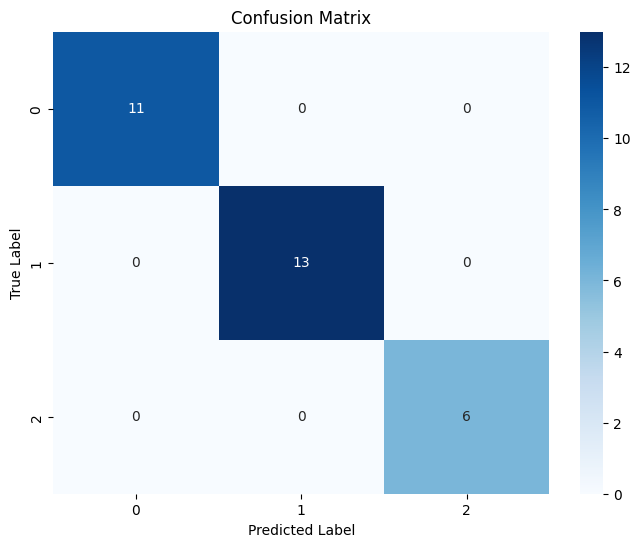

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()